In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
file1 = open('data_raw.log', 'r')
count = 0
my_list = []
while True:
    count += 1
  
    # Get next line from file
    line = file1.readline()
    if not line:
        break
    #print("Line{}: {}".format(count, line.strip()))
    my_list.append([line.strip()])
file1.close()
  

In [79]:
df = pd.read_csv("data_raw.log")
m_air = np.array(df[0:750:9].values.tolist())
m_fuel_des = np.array(df[1:750:9] .values.tolist())
t_fuel = np.array(df[2:750:9].values.tolist() )
impulse = np.array(df[3:750:9].values.tolist() )
m_fuel_act = np.array(df[4:750:9].values.tolist() )
new_power = np.array(df[5:750:9].values.tolist() )
new_rpm = np.array(df[6:750:9].values.tolist())
new_afr= np.array(df[7:750:9].values.tolist() )
adjustment = np.array(df[8:750:9].values.tolist() )
x = np.arange(1,83,1)
m_fuel_dif = m_fuel_des - m_fuel_act

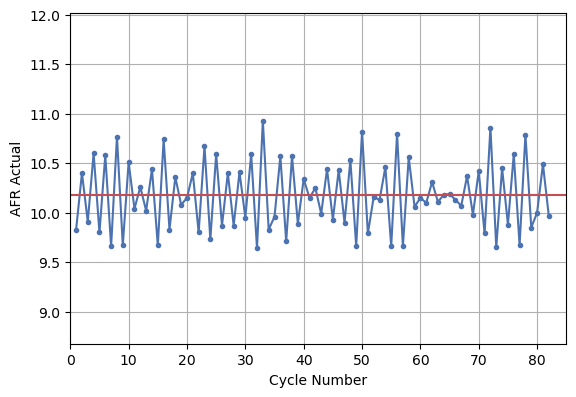

In [85]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
def plotter(y_label,y_list):
    fig = plt.figure()
    fig.subplots_adjust(top=0.8)
    ax1 = fig.add_subplot(111)
    ax1.set_ylabel(y_label)
    ax1.set_xlabel('Cycle Number')

    plt.ylim(y_list.min()*0.9,y_list.max()*1.1)
    plt.xlim(0,85)
    ax1.grid(visible=True)

    scatter = ax1.plot(x, y_list, marker=".",color="b")
    ##line = ax1.plot(x,y,lw=1,color="g")
    midline = ax1.axhline(y = y_list.mean(), color = 'r', linestyle = '-')
    plt.show()
                   
plotter("AFR Actual", new_afr)

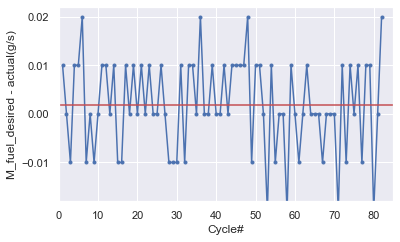

In [70]:
plotter("M_fuel_desired - actual(g/s)",m_fuel_dif)


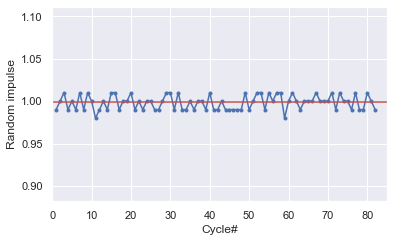

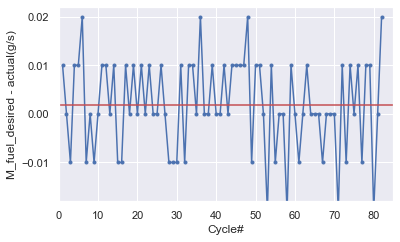

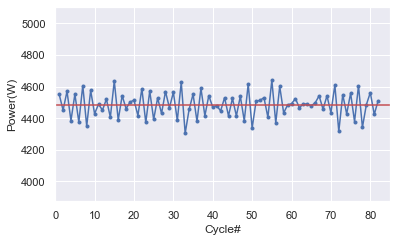

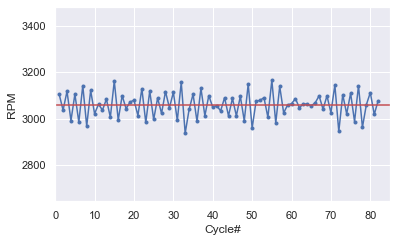

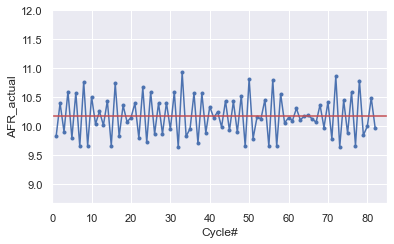

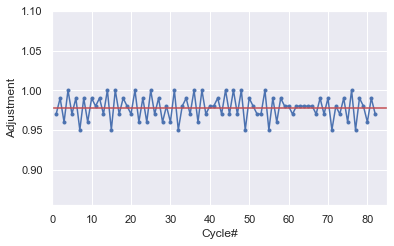

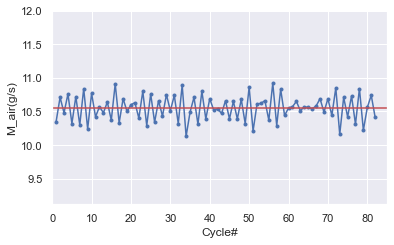

In [71]:
plotter("Random impulse",impulse)
plotter("M_fuel_desired - actual(g/s)",m_fuel_dif)
plotter("Power(W)",new_power)
plotter("RPM",new_rpm)
plotter("AFR_actual",new_afr)
plotter("Adjustment",adjustment)
plotter("M_air(g/s)", m_air)

In [72]:
new_afr = new_afr - (new_afr.mean()-9.75)

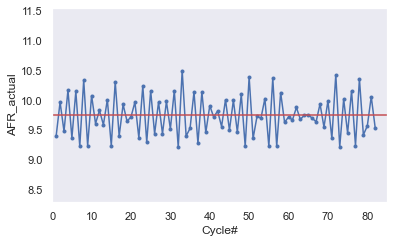

In [58]:
plotter("AFR_actual",new_afr)


In [37]:

x = x[0]
y = new_afr

mymodel = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

ValueError: Polynomial must be 1d only.

In [33]:
x = np.transpose(x)

In [40]:
x

array([ 9.40414634,  9.97414634,  9.48414634, 10.17414634,  9.37414634,
       10.15414634,  9.23414634, 10.34414634,  9.24414634, 10.08414634,
        9.61414634,  9.83414634,  9.59414634, 10.01414634,  9.24414634,
       10.31414634,  9.40414634,  9.93414634,  9.65414634,  9.72414634,
        9.97414634,  9.37414634, 10.24414634,  9.30414634, 10.16414634,
        9.44414634,  9.97414634,  9.44414634,  9.98414634,  9.52414634,
       10.16414634,  9.21414634, 10.50414634,  9.40414634,  9.53414634,
       10.14414634,  9.28414634, 10.14414634,  9.46414634,  9.91414634,
        9.72414634,  9.82414634,  9.56414634, 10.01414634,  9.50414634,
       10.00414634,  9.47414634, 10.10414634,  9.23414634, 10.39414634,
        9.36414634,  9.73414634,  9.70414634, 10.03414634,  9.23414634,
       10.37414634,  9.23414634, 10.13414634,  9.63414634,  9.72414634,
        9.67414634,  9.88414634,  9.68414634,  9.75414634,  9.76414634,
        9.70414634,  9.64414634,  9.94414634,  9.55414634,  9.99